In [176]:
import pandas as pd
import numpy as np 
import re
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



from sklearn import metrics,tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score , auc
from sklearn.model_selection import GridSearchCV



import seaborn as sns
import matplotlib.pyplot as plt


import time

In [141]:
phishing_df = pd.read_csv('phishing.csv')

phishing_df = phishing_df.dropna()
phishing_df = phishing_df.drop_duplicates()
phishing_df = phishing_df.drop(columns=['Index'])
phishing_df = phishing_df.drop(columns=['WebsiteTraffic'])
phishing_df = phishing_df.drop(columns=['LinksPointingToPage'])
phishing_df = phishing_df.drop(columns=['StatsReport'])
phishing_df = phishing_df.drop(columns=['PageRank'])

In [142]:
print(phishing_df.info())
print(phishing_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   UsingIP            11054 non-null  int64
 1   LongURL            11054 non-null  int64
 2   ShortURL           11054 non-null  int64
 3   Symbol@            11054 non-null  int64
 4   Redirecting//      11054 non-null  int64
 5   PrefixSuffix-      11054 non-null  int64
 6   SubDomains         11054 non-null  int64
 7   HTTPS              11054 non-null  int64
 8   DomainRegLen       11054 non-null  int64
 9   Favicon            11054 non-null  int64
 10  NonStdPort         11054 non-null  int64
 11  HTTPSDomainURL     11054 non-null  int64
 12  RequestURL         11054 non-null  int64
 13  AnchorURL          11054 non-null  int64
 14  LinksInScriptTags  11054 non-null  int64
 15  ServerFormHandler  11054 non-null  int64
 16  InfoEmail          11054 non-null  int64
 17  AbnormalURL 

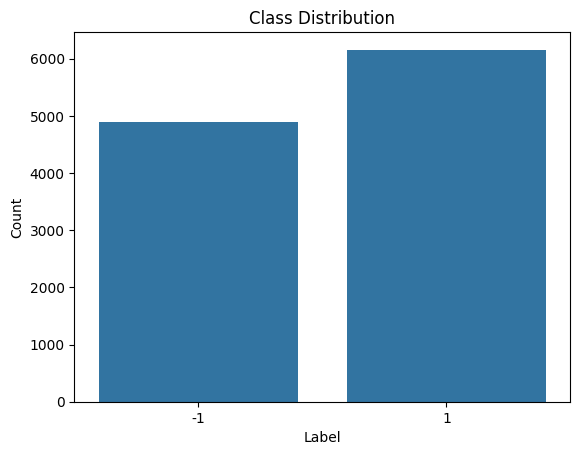

In [143]:
sns.countplot(x='class', data=phishing_df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [144]:
X = phishing_df.drop(columns=['class']).values  # Features 
y = phishing_df['class'].values  # Labels 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model

In [182]:
svm_classifier =  SVC(kernel='poly', degree=9, random_state=12,probability=True) 

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(degree=9, kernel='poly', probability=True, random_state=12)

Predicted: 0
Accuracy: 0.96
Precision: 0.95
Recall: 0.97
F1: 0.96
Cohens Kappa: 0.91


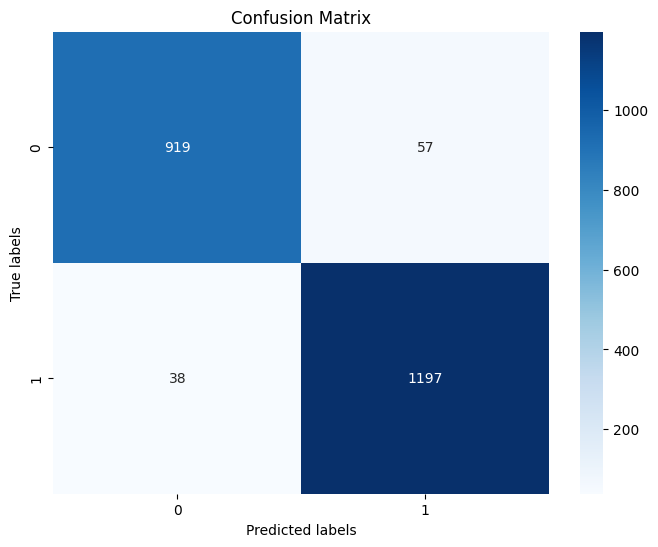

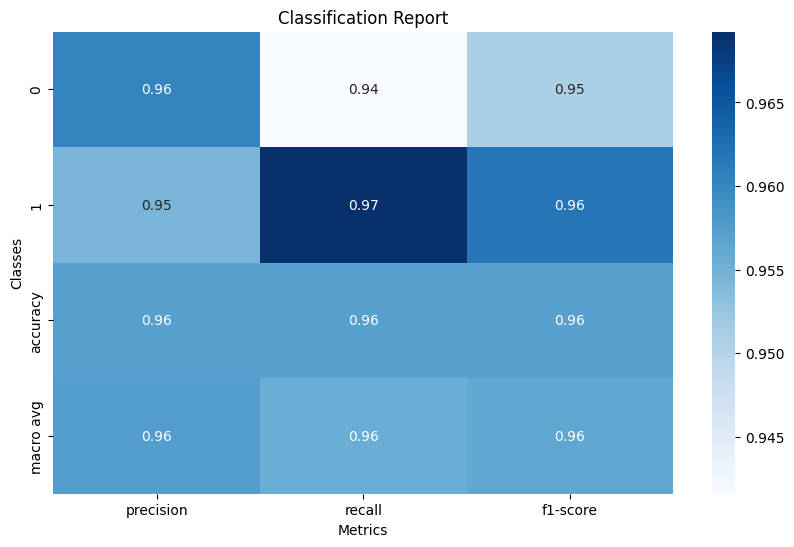

In [184]:
svm_y_pred = svm_classifier.predict(X_test)

test_pred = svm_classifier.predict(X_test[0:1])
print('Predicted:', test_pred[0])

# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_kappa = cohen_kappa_score(y_test, svm_y_pred)


print('Accuracy: {:.2f}'.format(svm_accuracy))
print('Precision: {:.2f}'.format(svm_precision))
print('Recall: {:.2f}'.format(svm_recall))
print('F1: {:.2f}'.format(svm_f1))
print('Cohens Kappa: {:.2f}'.format(svm_kappa))


cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, svm_y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# Decision Tree

In [178]:
decision_tree_classifier = DecisionTreeClassifier(criterion = "entropy",random_state=42,max_depth=10)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

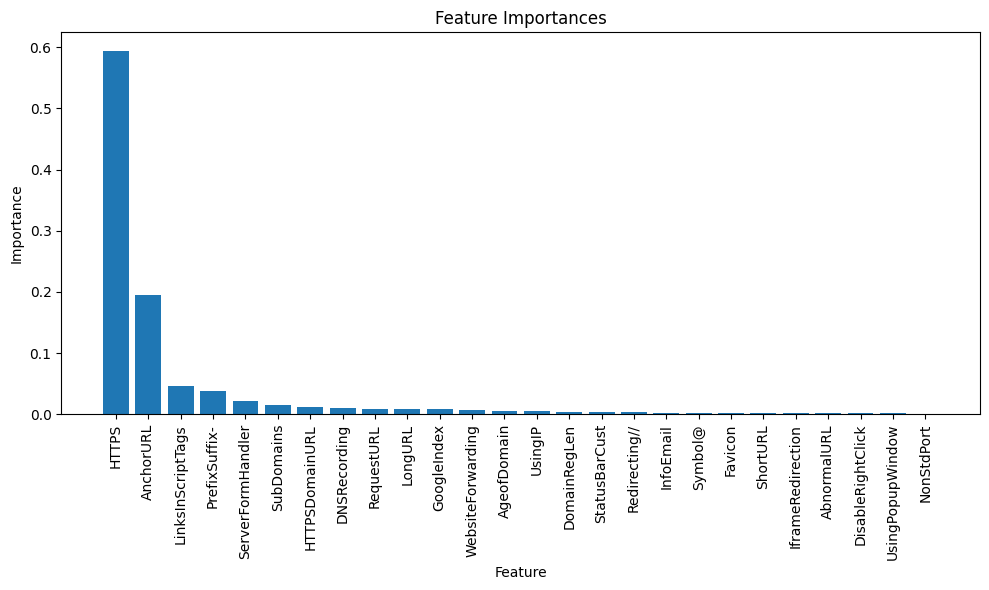

Accuracy: 0.93
Precision: 0.94
Recall: 0.94
F1: 0.94
Cohens Kappa: 0.87


In [148]:
dtc_y_pred = decision_tree_classifier.predict(X_test)

feature_importances = decision_tree_classifier.feature_importances_

# Get the names of the features
feature_names = phishing_df.columns[:-1]  # Assuming phishing_df contains your dataset

# Sort feature importances and feature names in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

dt_accuracy = accuracy_score(y_test, dtc_y_pred)
dt_precision = precision_score(y_test, dtc_y_pred)
dt_recall = recall_score(y_test, dtc_y_pred)
dt_f1 = f1_score(y_test, dtc_y_pred)
dt_kappa = cohen_kappa_score(y_test, dtc_y_pred)


print('Accuracy: {:.2f}'.format(dt_accuracy))
print('Precision: {:.2f}'.format(dt_precision))
print('Recall: {:.2f}'.format(dt_recall))
print('F1: {:.2f}'.format(dt_f1))
print('Cohens Kappa: {:.2f}'.format(dt_kappa))


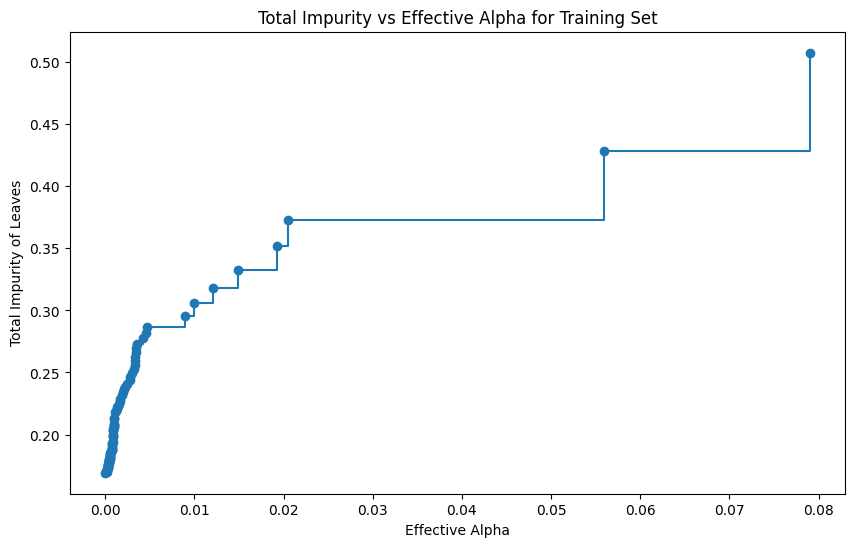

0.0


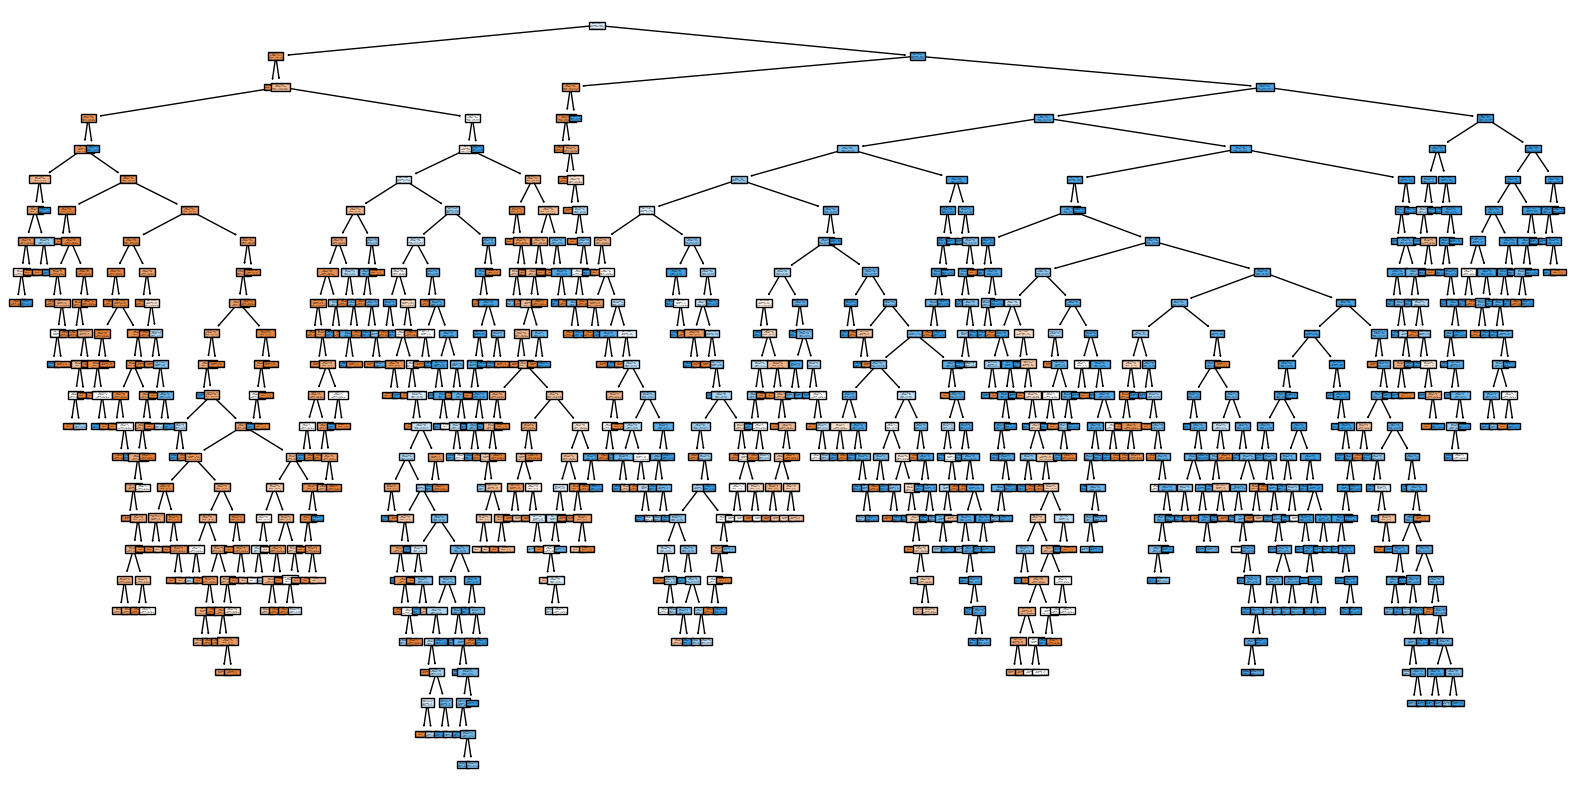

In [149]:
# Compute the impurity-based pruning path
path = decision_tree_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualize the pruning path
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

# Select the best alpha value
param_grid = {'ccp_alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005]}  # Adjust the range as needed

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ccp_alpha']
print(best_alpha)
# For example, using cross-validation

# Prune the tree using the selected alpha value
dtc_pruned = DecisionTreeClassifier(ccp_alpha=0.0, random_state=42,criterion='gini')
dtc_pruned.fit(X_train, y_train)

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtc_pruned, filled=True, feature_names= list(phishing_df.columns[:-1]), class_names=['not phishing','phishing'])

plt.show()

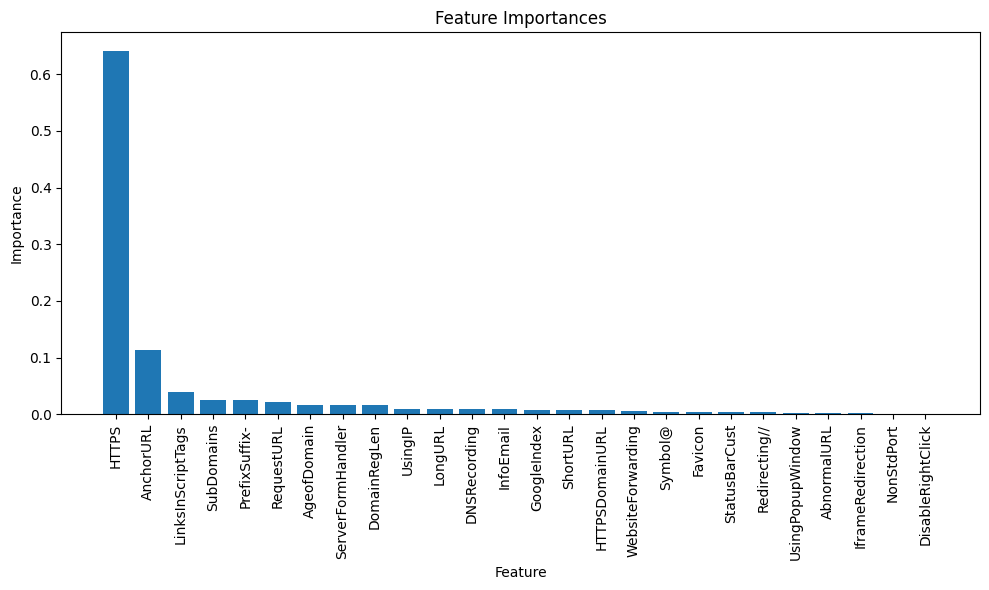

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1: 0.96
Cohens Kappa: 0.91


In [150]:
dtc_pruned_y_pred = dtc_pruned.predict(X_test)

pruned_feature_importances = dtc_pruned.feature_importances_

# Get the names of the features
feature_names = phishing_df.columns[:-1]  

# Sort feature importances and feature names in descending order
indices = np.argsort(pruned_feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(pruned_feature_importances)), pruned_feature_importances[indices], align="center")
plt.xticks(range(len(pruned_feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

dtp_accuracy = accuracy_score(y_test, dtc_pruned_y_pred)
dtp_precision = precision_score(y_test, dtc_pruned_y_pred)
dtp_recall = recall_score(y_test, dtc_pruned_y_pred)
dtp_f1 = f1_score(y_test, dtc_pruned_y_pred)
dtp_kappa = cohen_kappa_score(y_test, dtc_pruned_y_pred)


print('Accuracy: {:.2f}'.format(dtp_accuracy))
print('Precision: {:.2f}'.format(dtp_precision))
print('Recall: {:.2f}'.format(dtp_recall))
print('F1: {:.2f}'.format(dtp_f1))
print('Cohens Kappa: {:.2f}'.format(dtp_kappa))


# RandomForest 

In [151]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

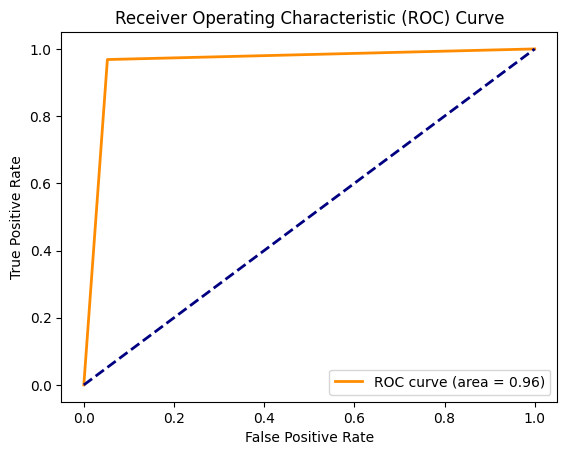

Accuracy: 0.96
Precision: 0.96
Recall: 0.97
F1: 0.96
Cohens Kappa: 0.92


In [152]:
rfc_y_pred = rfc_model.predict(X_test)

rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
rfc_precision = precision_score(y_test, rfc_y_pred)
rfc_recall = recall_score(y_test, rfc_y_pred)
rfc_f1 = f1_score(y_test, rfc_y_pred)
rfc_kappa = cohen_kappa_score(y_test, rfc_y_pred)


fpr, tpr, thresholds = roc_curve(y_test, rfc_y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print('Accuracy: {:.2f}'.format(rfc_accuracy))
print('Precision: {:.2f}'.format(rfc_precision))
print('Recall: {:.2f}'.format(rfc_recall))
print('F1: {:.2f}'.format(rfc_f1))
print('Cohens Kappa: {:.2f}'.format(rfc_kappa))

# XGBoost

In [153]:
XGB_model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='error' ,  #for binary classification
    random_state = 42 ,
    max_depth= 15,
    min_child_weight= 4
    
    
)

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

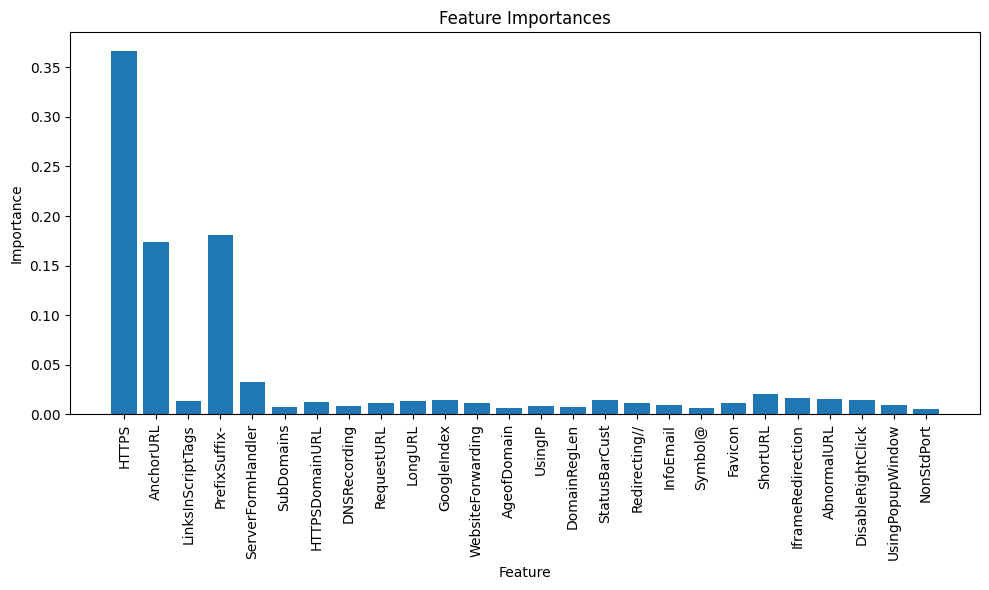

Accuracy: 0.96
Precision: 0.96
Recall: 0.97
Cohens Kappa: 0.91


In [154]:


# Make predictions
XGB_y_pred = XGB_model.predict(X_test)

# Evaluate the model
XGB_accuracy = accuracy_score(y_test, XGB_y_pred)
XGB_precison = precision_score(y_test, XGB_y_pred)
XGB_recall = recall_score(y_test, XGB_y_pred)
XGB_f1 = f1_score(y_test, XGB_y_pred)
XGB_kappa = cohen_kappa_score(y_test, XGB_y_pred)

XGB_feature_importances = XGB_model.feature_importances_

# Get the names of the features
feature_names = phishing_df.columns[:-1]  

# Sort feature importances and feature names in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(XGB_feature_importances)), XGB_feature_importances[indices], align="center")
plt.xticks(range(len(XGB_feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print('Accuracy: {:.2f}'.format(XGB_accuracy))
print('Precision: {:.2f}'.format(XGB_precison))
print('Recall: {:.2f}'.format(XGB_recall))
print('Cohens Kappa: {:.2f}'.format(XGB_kappa))


# Logistic Rgression

In [155]:
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [157]:
LR_y_pred = LR_model.predict(X_test)

LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_precision = precision_score(y_test, LR_y_pred)
LR_recall = recall_score(y_test, LR_y_pred)
LR_f1 = f1_score(y_test, LR_y_pred)
LR_kappa = cohen_kappa_score(y_test, LR_y_pred)


print('Accuracy: {:.2f}'.format(LR_accuracy))
print('Precision: {:.2f}'.format(LR_precision))
print('Recall: {:.2f}'.format(LR_recall))
print('F1: {:.2f}'.format(LR_f1))
print('Cohens Kappa: {:.2f}'.format(LR_kappa))

Accuracy: 0.92
Precision: 0.92
Recall: 0.95
F1: 0.93
Cohens Kappa: 0.84


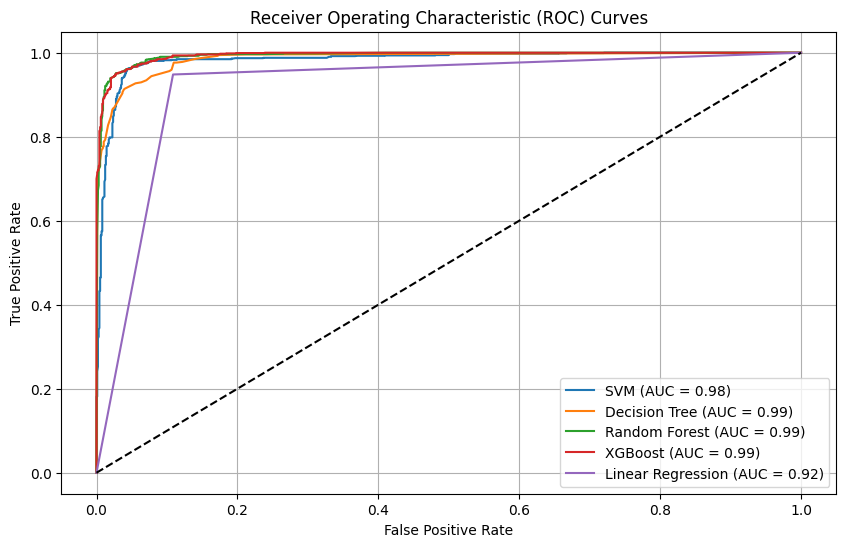

In [158]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

# SVM
svm_probs = svm_classifier.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
auc_svm = roc_auc_score(y_test, svm_probs)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')


# Decision Tree
dt_probs = decison_tree_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
auc_dt = roc_auc_score(y_test, dt_probs)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Random Forest
rf_probs = rfc_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# XGBoost
xgb_probs = XGB_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Linear Regression
lr_probs = LR_model.predict(X_test)  
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
auc_lr = roc_auc_score(y_test, lr_probs)
plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression (AUC = {auc_lr:.2f})')



# Plotting the ROC curve for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

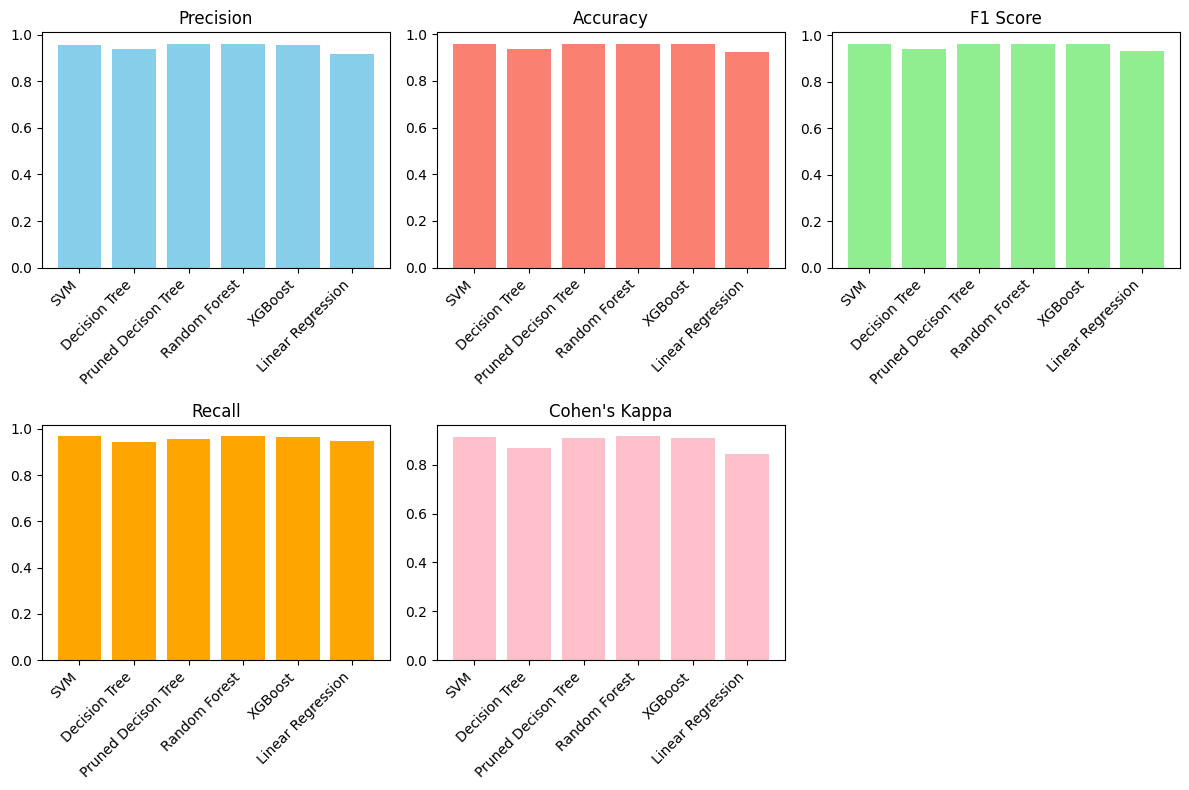

                 Model  Precision  Accuracy  F1 Score    Recall  Cohen's Kappa
0                  SVM   0.954545  0.957033  0.961832  0.969231       0.912692
1        Decision Tree   0.938808  0.934419  0.941461  0.944130       0.866913
2  Pruned Decison Tree   0.961789  0.955224  0.959838  0.957895       0.909251
3        Random Forest   0.959102  0.959294  0.963739  0.968421       0.917350
4              XGBoost   0.955200  0.956128  0.960966  0.966802       0.910893
5    Linear Regression   0.916993  0.923112  0.932325  0.948178       0.843377


In [173]:
model_names = ['SVM','Decision Tree','Pruned Decison Tree', 'Random Forest', 'XGBoost','Linear Regression' ]

accuracy_scores = [svm_accuracy, dt_accuracy, dtp_accuracy, rfc_accuracy, XGB_accuracy, LR_accuracy]
precision_scores = [svm_precision, dt_precision, dtp_precision, rfc_precision, XGB_precison, LR_precision]
f1_scores = [svm_f1, dt_f1, dtp_f1, rfc_f1, XGB_f1, LR_f1]
recall_scores = [svm_recall, dt_recall, dtp_recall, rfc_recall, XGB_recall, LR_recall]
cohen_kappa_scores = [svm_kappa, dt_kappa, dtp_kappa, rfc_kappa, XGB_kappa, LR_kappa]


data = {
    'Model': model_names,
    'Precision': precision_scores,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    "Cohen's Kappa": cohen_kappa_scores
}
df = pd.DataFrame(data)


plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))

# Precision
plt.subplot(2, 3, 1)
plt.bar(df['Model'], df['Precision'], color='skyblue')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

# Accuracy
plt.subplot(2, 3, 2)
plt.bar(df['Model'], df['Accuracy'], color='salmon')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

# F1 Score
plt.subplot(2, 3, 3)
plt.bar(df['Model'], df['F1 Score'], color='lightgreen')
plt.title('F1 Score')
plt.xticks(rotation=45, ha='right')

# Recall
plt.subplot(2, 3, 4)
plt.bar(df['Model'], df['Recall'], color='orange')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

# Cohen's Kappa
plt.subplot(2, 3, 5)
plt.bar(df['Model'], df["Cohen's Kappa"], color='pink')
plt.title("Cohen's Kappa")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(df)

In [179]:
joblib.dump(svm_classifier, 'svm_phishing_model.pkl')
joblib.dump(decision_tree_classifier, 'decision_tree_phishing_model.pkl')
joblib.dump(rfc_model, 'random_forest_phishing_model.pkl')
joblib.dump(XGB_model, 'XGBoost_phishing_model.pkl')
joblib.dump(LR_model, 'linear_regression_phishing_model.pkl')

['linear_regression_phishing_model.pkl']